# Data Mining - 3rd Homework
Fatemeh Shiri

## Import Prequisites

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer   

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from math import sqrt

import xgboost


from ydata_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.2f}'.format)
np.set_printoptions(suppress=True)



In [169]:
df = pd.read_csv("USvideos.csv")

In [170]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [171]:
profile = ProfileReport(df, title="Profiling Report")
# profile.to_html()

## EDA

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [173]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [148]:
df.describe(include=[np.object])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


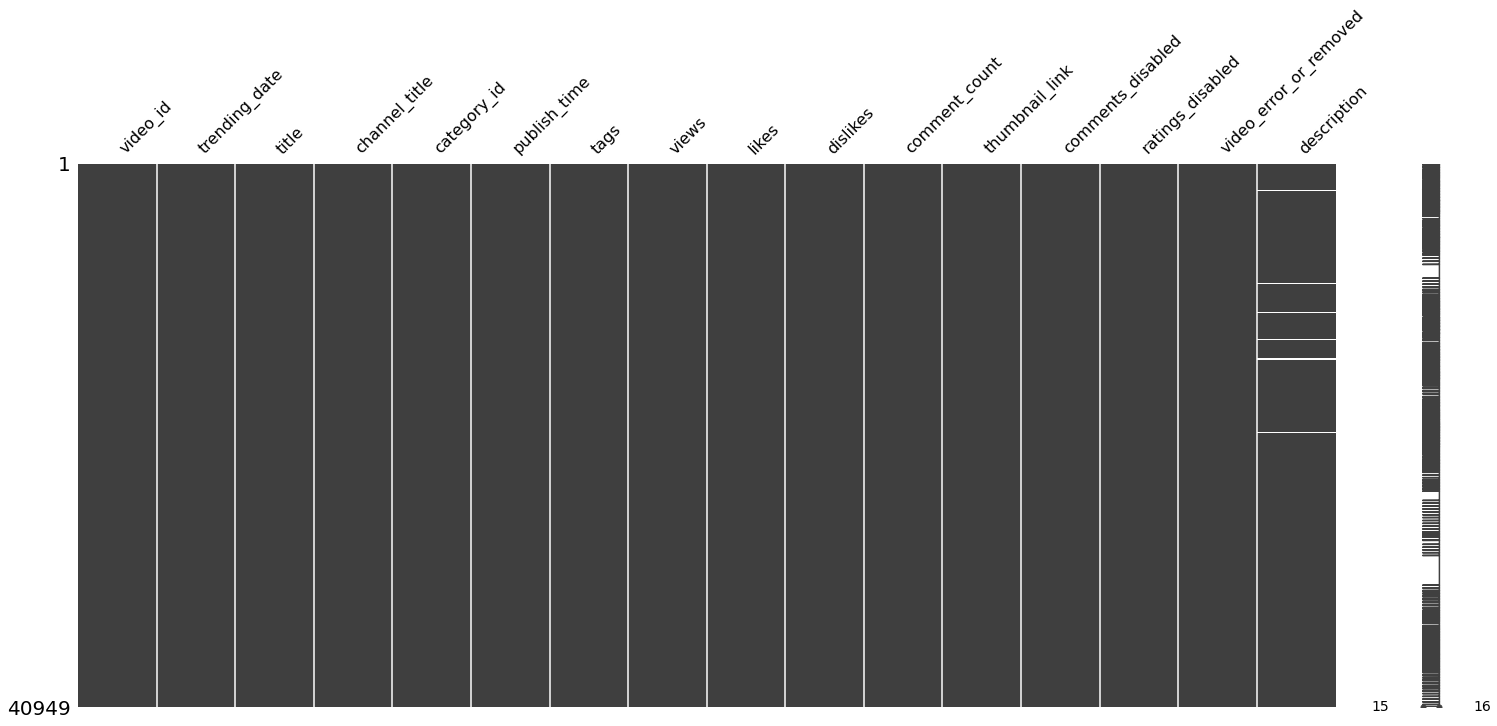

In [149]:
import missingno as msno
msno.matrix(df);

In [174]:
df = df.dropna()

In [175]:
df = df.drop_duplicates()

In [176]:
#removing the infinite values
df=df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how='any',axis=0)

In [177]:
# df['trend_gap'] = np.log10(df['trend_gap'] +1)


In [178]:
df['comments_disabled'] = df['comments_disabled'].map({True:1,False:0})
df['ratings_disabled'] = df['ratings_disabled'].map({True:1,False:0})
df['video_error_or_removed'] = df['video_error_or_removed'].map({True:1,False:0})

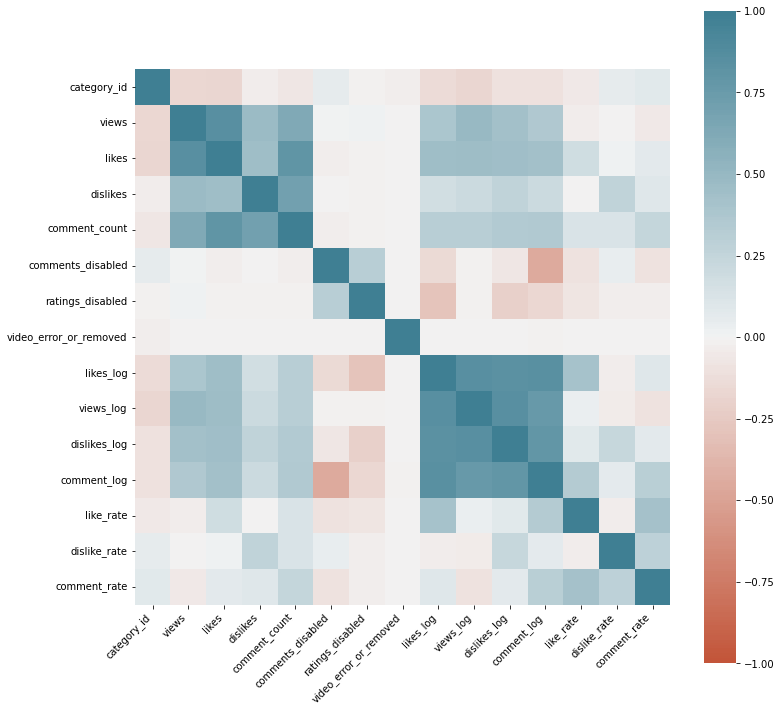

In [26]:
data = df

corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

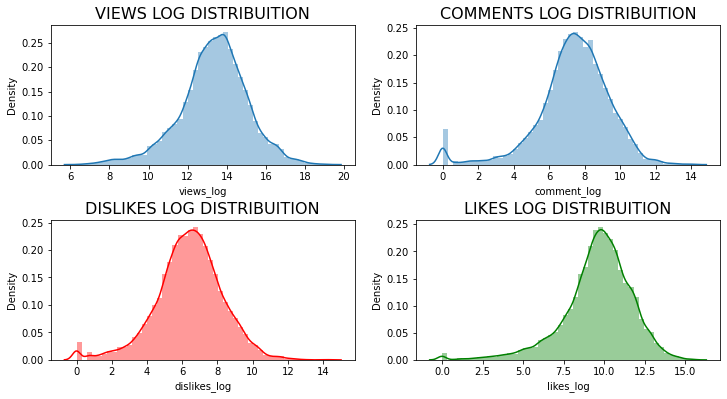

In [20]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [179]:
encoder = OneHotEncoder()
category_encoded = encoder.fit_transform(df[['category_id']])

In [180]:
df = df.merge(pd.DataFrame(category_encoded.toarray(), columns=encoder.categories_[0]), left_index=True, right_index=True)

In [167]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,20,22,23,24,25,26,27,28,29,43
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


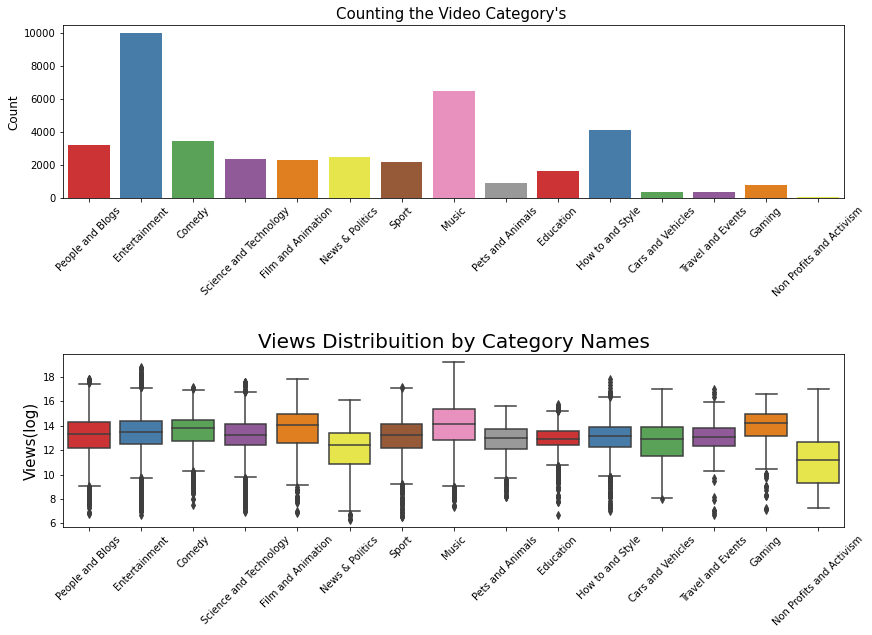

In [22]:
print("Category Name count")
print(df.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

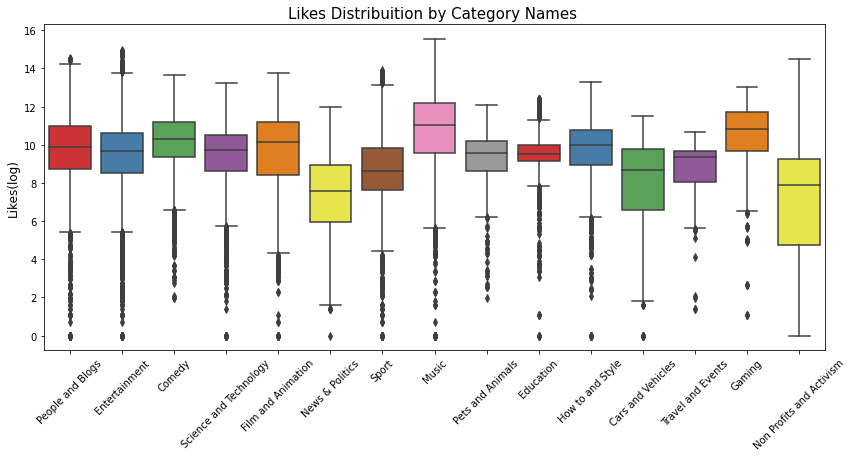

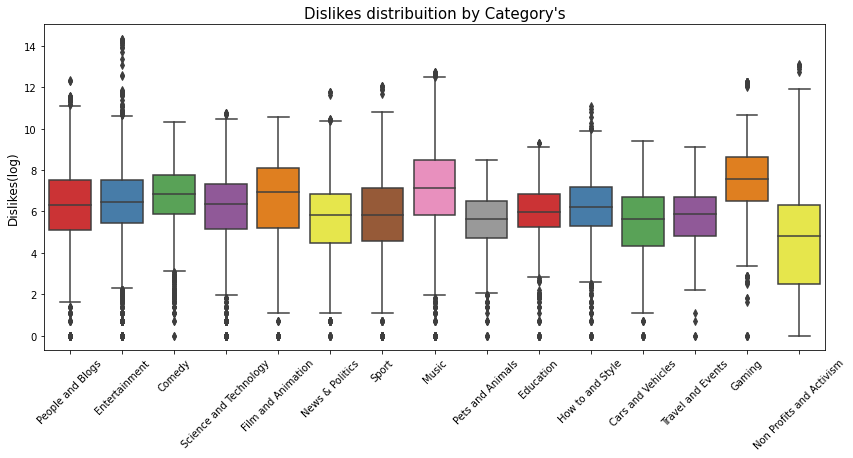

In [23]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()


plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

In [193]:
xgb = xgboost.XGBRFRegressor()

df_ = df.select_dtypes(exclude=['object', 'datetime64[ns, UTC]'])

X = df_[df_.columns.drop(['likes','category_id'])]
Y = df_['likes']


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

xgb = xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

In [196]:
mean_squared_error(y_test, y_pred), \
     mean_absolute_error(y_test, y_pred), \
     r2_score(y_test, y_pred),\
     mean_absolute_percentage_error(y_test, y_pred) * 100

(3497617759.2721267,
 23564.40991957742,
 0.9432151027955101,
 1.5676074840005677e+19)

### Feature Extraction 1 - Rate Features

In [197]:
df['like_rate'] =  df ['likes'] / df['views'] * 100
df['dislike_rate'] =  df ['dislikes'] / df['views'] * 100
df['comment_rate'] =  df ['comment_count'] / df['views'] * 100

In [198]:
df["Ratio_likes_dislikes"]=round(df["likes"]/df["dislikes"],3)

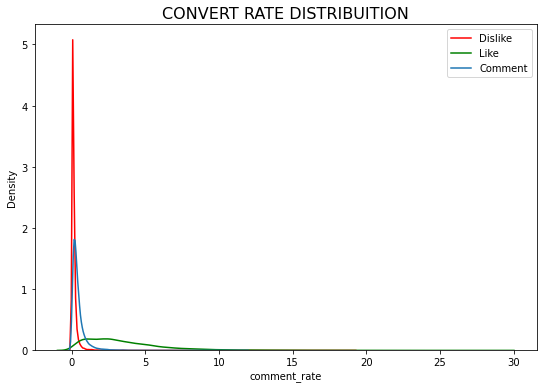

In [199]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(df['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(df['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

In [200]:
df['dislike_percentage'] = df['dislikes'] / (df['dislikes'] + df['likes'])
df.dislike_percentage.describe(percentiles=[.05,.25,.5,.75,.95])

count    39548.000000
mean         0.065337
std          0.099484
min          0.000000
5%           0.007226
25%          0.017084
50%          0.032780
75%          0.068555
95%          0.240846
max          1.000000
Name: dislike_percentage, dtype: float64

In [204]:
df=df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how='any',axis=0)

In [211]:
xgb = xgboost.XGBRFRegressor()

df_ = df.select_dtypes(exclude=['object', 'datetime64[ns, UTC]'])

X = df_[df_.columns.drop(['likes','category_id'])]
Y = df_['likes']


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

xgb = xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

In [213]:
mean_squared_error(y_test, y_pred), \
     mean_absolute_error(y_test, y_pred), \
     r2_score(y_test, y_pred),\
     mean_absolute_percentage_error(y_test, y_pred)

(1758863867.3407617,
 13988.616724588037,
 0.9726423967990672,
 3341046260113211.5)

### Feature Extraction 2 - Text Features 

In [27]:
# import nltk
# nltk.download('stopwords')
#Setting the stopwords
eng_stopwords = set(stopwords.words("english"))


In [214]:
#Word count in each comment:
df['count_word']=df["title"].apply(lambda x: len(str(x).split()))
df['count_word_tags']=df["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["title"].apply(lambda x: len(set(str(x).split())))
df['count_unique_word_tags']=df["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["title"].apply(lambda x: len(str(x)))
df['count_letters_tags']=df["tags"].apply(lambda x: len(str(x)))

#punctuation count
df["count_punctuations"] =df["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df["count_punctuations_tags"] =df["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df["count_words_upper_tags"] = df["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df["count_words_title"] = df["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df["count_words_title_tags"] = df["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df["count_stopwords_tags"] = df["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df["mean_word_len_tags"] = df["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [215]:
#Word count percent in each comment:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
df['word_unique_percent_tags']=df['count_unique_word_tags']*100/df['count_word_tags']

#Punct percent in each comment:
df['punct_percent']=df['count_punctuations']*100/df['count_word']
df['punct_percent_tags']=df['count_punctuations_tags']*100/df['count_word_tags']

In [216]:
df["No_tags"] = df["tags"].apply(lambda x: x.count("|")+1)

In [217]:
df["desc_len"] = df["description"].apply(len)

In [218]:
df["len_title"] = df["title"].apply(len)

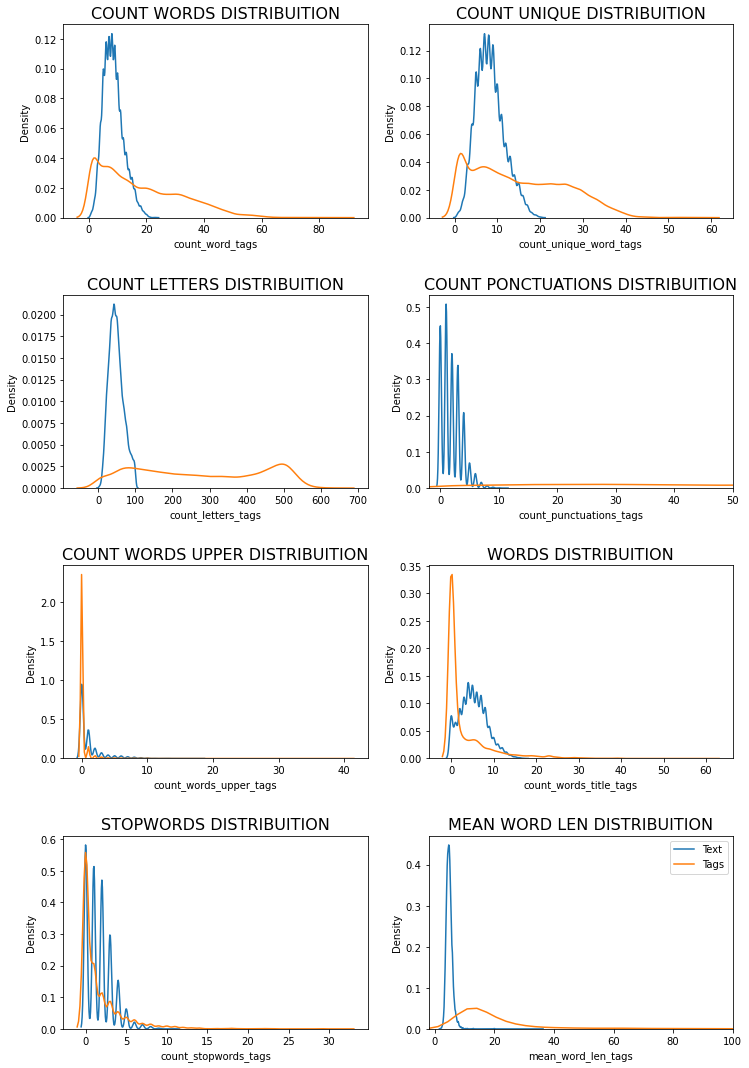

In [30]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df['count_word'], 
                  hist=False, label='Text')
g1 = sns.distplot(df['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(df['count_unique_word'],
                  hist=False, label='Text')
g2 = sns.distplot(df['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(df['count_letters'], 
                  hist=False, label='Text')
g3 = sns.distplot(df['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(df["count_punctuations"], 
                  hist=False, label='Text')
g4 = sns.distplot(df["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(df["count_words_upper"] , 
                  hist=False, label='Text')
g5 = sns.distplot(df["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(df["count_words_title"], 
                  hist=False, label='Text')
g6 = sns.distplot(df["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(df["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(df["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(df["mean_word_len"], 
                  hist=False, label='Text')
g8 = sns.distplot(df["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

In [219]:
df=df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how='any',axis=0)

In [220]:
xgb = xgboost.XGBRFRegressor()

df_ = df.select_dtypes(exclude=['object', 'datetime64[ns, UTC]'])

X = df_[df_.columns.drop(['likes','category_id'])]
Y = df_['likes']


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

xgb = xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

In [221]:
mean_squared_error(y_test, y_pred), \
     mean_absolute_error(y_test, y_pred), \
     r2_score(y_test, y_pred),\
     mean_absolute_percentage_error(y_test, y_pred)

(1327919485.791921, 13650.038217653104, 0.9793453631917474, 3266774752482382.0)

### Feature Extraction 3 - Time Features

Category Name count
5     6210
3     6094
2     6032
12    6029
1     5313
Name: month, dtype: int64


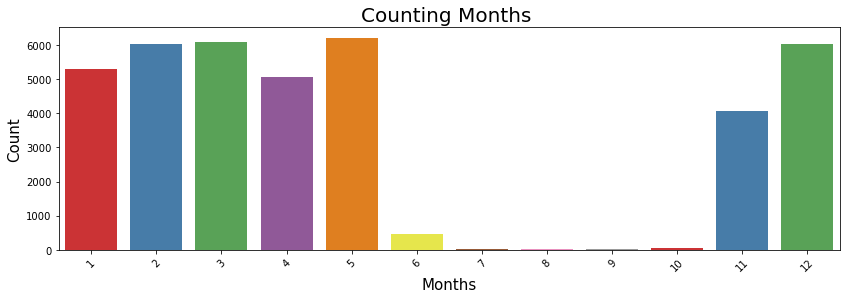

In [222]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['month'] = df['publish_time'].apply(lambda x:x.month)

print("Category Name count")
print(df['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)


plt.show()

Category Name count
5     6210
3     6094
2     6032
12    6029
1     5313
Name: trndeing_month, dtype: int64


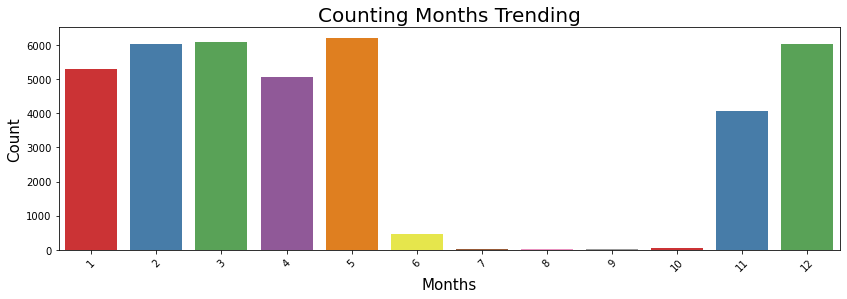

In [223]:
df['tranding_date'] = pd.to_datetime(df['publish_time'])
df['trndeing_month'] = df['publish_time'].apply(lambda x:x.month)

print("Category Name count")
print(df['trndeing_month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('trndeing_month', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months Trending", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)


plt.show()

In [ ]:
df['trending_date'] = pd.to_datetime(df['trending_date']).dt.date
df.trending_date.value_counts().sort_index(inplace=True)


In [ ]:
df['publish_time'] = pd.to_datetime(df['publish_time'])

df['publish_date'] = df['publish_time'].apply(lambda x:x.date)
df['days_to_trending'] = (df.trending_date - df.publish_date).dt.days
df.days_to_trending.describe(percentiles=[.05,.25,.5,.75,.95])

In [228]:
df['publish_date'] = df['publish_time'].apply(lambda x:x.date)

df['publish_weekday'] = df['publish_time'].apply(lambda x: x.weekday()) 
df['publish_weekday'] = df['publish_weekday'].replace({'Monday':1,
                                                             'Tuesday':2,
                                                             'Wednesday':3,
                                                             'Thursday':4,
                                                             'Friday':5,
                                                             'Saturday':6,
                                                             'Sunday':7})

3    6825
4    6810
1    6663
2    6638
0    6044
6    3613
5    3559
Name: publish_weekday_names, dtype: int64


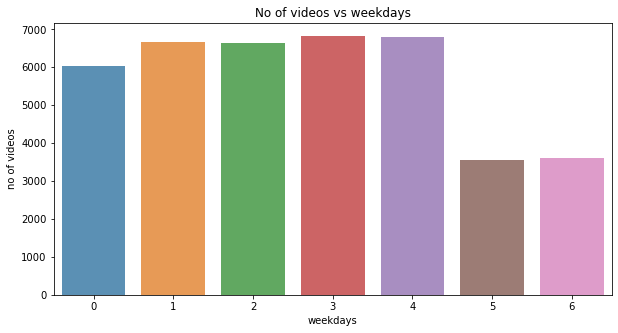

In [55]:
count=df["publish_weekday_names"].value_counts()
print(count)
plt.figure(figsize=(10,5))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('No of videos vs weekdays')
plt.ylabel('no of videos')
plt.xlabel('weekdays')
plt.show()


In [229]:
df=df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how='any',axis=0)

In [231]:
xgb = xgboost.XGBRFRegressor()

df_ = df.select_dtypes(exclude=['object', 'datetime64[ns, UTC]'])

X = df_[df_.columns.drop(['likes','category_id', 'publish_time'])]
Y = df_['likes']


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

xgb = xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

In [232]:
mean_squared_error(y_test, y_pred), \
     mean_absolute_error(y_test, y_pred), \
     r2_score(y_test, y_pred),\
     mean_absolute_percentage_error(y_test, y_pred)

(1299320784.885158, 13384.637242107856, 0.9797901912003255, 3237694681229465.0)

## Feature Selection

In [102]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'likes_log', 'views_log',
       'dislikes_log', 'comment_log', 'category_name', 'like_rate',
       'dislike_rate', 'comment_rate', 'count_word', 'count_word_tags',
       'count_unique_word', 'count_unique_word_tags', 'count_letters',
       'count_letters_tags', 'count_punctuations', 'count_punctuations_tags',
       'count_words_upper', 'count_words_upper_tags', 'count_words_title',
       'count_words_title_tags', 'count_stopwords', 'count_stopwords_tags',
       'mean_word_len', 'mean_word_len_tags', 'word_unique_percent',
       'word_unique_percent_tags', 'punct_percent', 'punct_percent_tags',
       'month', 'publish_date', 'days_to_trending', 'dislike_percentage',
       'No_tags', 'desc_len', 'len_title', 'publ

In [233]:
df_ = df.select_dtypes(exclude=['object', 'datetime64[ns, UTC]'])

In [236]:
X = df_[df_.columns.drop(['likes', 'publish_time'])]
y = df_['likes']

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # Naming the dataframe columns

# Print 10 best features
print(featureScores.nlargest(20,'Score'))  

                      Specs           Score
1                     views 917152059184.39
2                  dislikes   6120611225.98
3             comment_count   5688177118.32
47       punct_percent_tags     59886993.23
49                 desc_len     21207886.68
33       count_letters_tags      3019483.33
26     Ratio_likes_dislikes      1888315.59
43       mean_word_len_tags      1351579.71
35  count_punctuations_tags       672189.70
46            punct_percent       571988.76
29          count_word_tags       335656.74
39   count_words_title_tags       321244.63
32            count_letters       230638.31
50                len_title       230638.31
31   count_unique_word_tags       222550.07
37   count_words_upper_tags       216991.79
48                  No_tags       211034.31
41     count_stopwords_tags       150792.41
36        count_words_upper       109029.02
0               category_id        86962.98


In [242]:
df=df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how='any',axis=0)

xgb = xgboost.XGBRFRegressor()

df_ = df.select_dtypes(exclude=['object', 'datetime64[ns, UTC]'])

X = df_[list(featureScores.nlargest(20,'Score')['Specs'].values)]
Y = df_['likes']


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

xgb = xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)


mean_squared_error(y_test, y_pred), \
     mean_absolute_error(y_test, y_pred), \
     r2_score(y_test, y_pred),\
     mean_absolute_percentage_error(y_test, y_pred)

(1611062280.1335592,
 16505.988295144183,
 0.9749413224011925,
 3348963246658638.0)

In [255]:
X = df_[df_.columns.drop(['likes', 'publish_time'])].sample(10000, random_state=42)
y = df_['likes'].sample(10000, random_state=42)

clf = RandomForestRegressor()
clf.fit(X, y)

# Print feature importances
for feature in zip(df_.columns, clf.feature_importances_):
    print(feature)

('category_id', 0.007053003276353356)
('publish_time', 0.219716600162823)
('views', 0.012696657457142008)
('likes', 0.6733854345662984)
('dislikes', 1.0420183368775958e-07)
('comment_count', 0.0)
('comments_disabled', 5.805096644101707e-10)
('ratings_disabled', 8.575571706281597e-05)
('video_error_or_removed', 6.058444963501265e-07)
(1, 0.00022618446044894933)
(2, 4.303168700702637e-06)
(10, 4.2068593550724125e-05)
(15, 1.799888328962374e-05)
(17, 6.391049411345138e-05)
(19, 0.00012920937395352069)
(20, 3.947234332953793e-05)
(22, 0.00019421984904538825)
(23, 1.4684426228463513e-05)
(24, 3.3752524881560644e-05)
(25, 1.2066161200413221e-05)
(26, 9.794548186523818e-05)
(27, 4.323680931488004e-08)
(28, 1.5081676974522947e-06)
(29, 0.03647769808857505)
(43, 0.0015956162432656093)
('like_rate', 0.0016566312099433142)
('dislike_rate', 0.0036849728854377885)
('comment_rate', 0.004045903645704774)
('Ratio_likes_dislikes', 0.0009440776742822886)
('dislike_percentage', 0.007050567179738553)
('co

In [259]:
features =[]
for feature in zip(df_.columns, clf.feature_importances_):
    if feature[0] not in ['publish_time', 'likes']:
        features.append(feature)

features_sorted = sorted(features, key=lambda tup: tup[1], reverse=True)

selected_features = []
for i in features_sorted[0:20]:
    selected_features.append(i[0])

In [261]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how='any',axis=0)

xgb = xgboost.XGBRFRegressor()

df_ = df.select_dtypes(exclude=['object', 'datetime64[ns, UTC]'])

X = df_[selected_features]
Y = df_['likes']


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

xgb = xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)


mean_squared_error(y_test, y_pred), \
     mean_absolute_error(y_test, y_pred), \
     r2_score(y_test, y_pred),\
     mean_absolute_percentage_error(y_test, y_pred)

(1207156715.51764, 11767.326470848022, 0.9812237234286907, 3761434027528629.5)

## Feature Reduction

In [262]:
X = df_[df_.columns.drop(['likes', 'publish_time'])]
y = df_['likes']

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

svd = TruncatedSVD(n_components=20)  # Reduce to 5 components
X_svd = svd.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_svd.shape)

original shape:    (39357, 54)
transformed shape: (39357, 20)


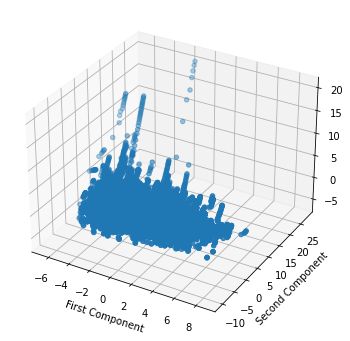

In [130]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_svd[:,0], X_svd[:,1], X_svd[:,2])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

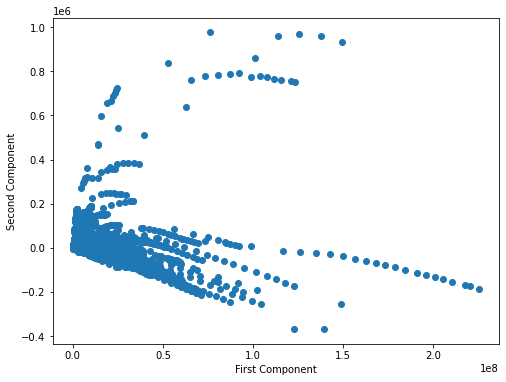

In [134]:
fig = plt.figure(figsize=(8,6))

plt.scatter(X_svd[:,0], X_svd[:,1])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

In [263]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how='any',axis=0)

Y = df_['likes']


xgb = xgboost.XGBRFRegressor()

x_train, x_test, y_train, y_test = train_test_split(X_svd, Y, test_size=0.2, random_state=42)

xgb = xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)


mean_squared_error(y_test, y_pred), \
     mean_absolute_error(y_test, y_pred), \
     r2_score(y_test, y_pred),\
     mean_absolute_percentage_error(y_test, y_pred)

(3522456289.362968, 23112.93293582327, 0.9452112450278949, 6705826439667251.0)

In [265]:
X = df_[df_.columns.drop(['likes', 'publish_time'])]
y = df_['likes']

scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=20)  # Reduce to 2 components
X_pca = pca.fit_transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (39357, 54)
transformed shape: (39357, 20)


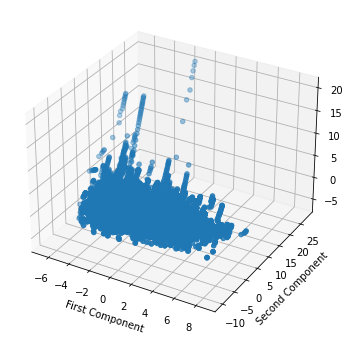

In [132]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2])
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

In [266]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how='any',axis=0)

Y = df_['likes']


xgb = xgboost.XGBRFRegressor()

x_train, x_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

xgb = xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)


mean_squared_error(y_test, y_pred), \
     mean_absolute_error(y_test, y_pred), \
     r2_score(y_test, y_pred),\
     mean_absolute_percentage_error(y_test, y_pred)

(6068458361.720106,
 43844.89573111185,
 0.9056103891926974,
 2.1277842881469904e+16)

In [270]:
print('{:.2f}'.format(2.1277842881469904e+16))

21277842881469904.00
